# Auto-Correlation and Partial Auto-Correlation

## Objectives:

* Plot and discuss the autocorrelation function for a time-series **(ACF)**.
* Plot and discuss the partial autocorrelation function for a time-series **(PACF)**.
* Interpret ACF and PACF and Identify use cases both functions. 


### Introduction
In the time-series visualisation lab, we briefly learnt how to draw an auto-correlation plot. Correlation plots that graphically plots the similarity of a data element in a time series with elements at previous time step(s).  In this lab we shall look at the topics of *auto-correlation* and *partial-correlation* in more depth. We shall also look into more plotting techniques.

### Dataset

Let's use the daily temperature dataset as we already have some insight for the behaviour of this time-series. Let's load the required libraries first.

In [3]:
import warnings
warnings.filterwarnings('ignore')
from pandas import Series
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

We can now load and plot the time-series.  

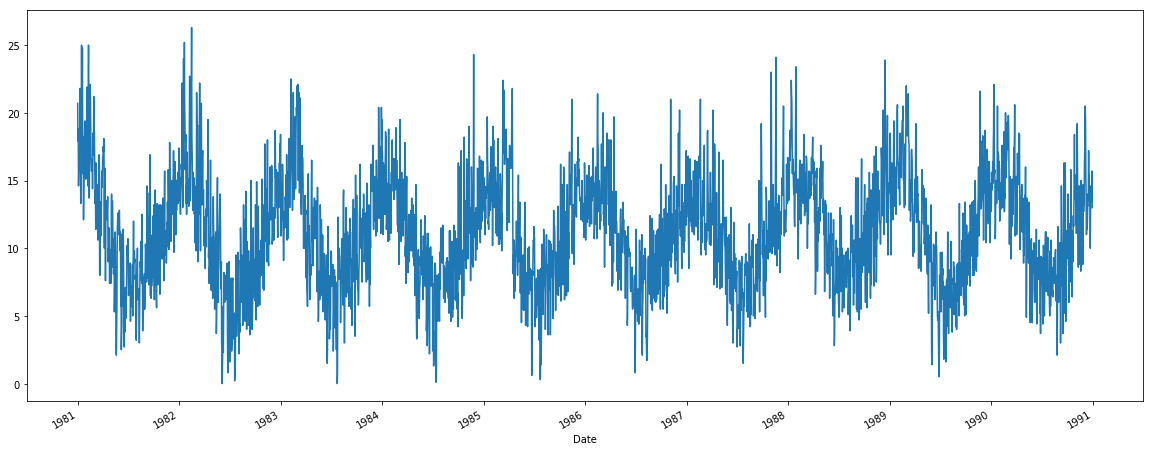

In [4]:
# Load temp.csv and plot the time-series


### Correlation

Correlation is a statistical technique that can show whether and how strongly pairs of variables are related to each other, considering each variable belongs to a normal distribution. For such correlated variables, we can use the Pearson’s correlation coefficient to summarize the correlation between the variables.

### Auto-Correlation Function

For time-series data, We calculate the correlation for time series elements with elements previous time steps, known as a *Lag*. As we are comparing values belonbging to a single variable, such correlation is called an *autocorrelation*. When we plot a time-series auto-correlation with lag values, this is called *AutoCorrelation Function* or **ACF**.

We can obtain ACF of our temperature dataset using the `plot_acf()` function from the statsmodels library.

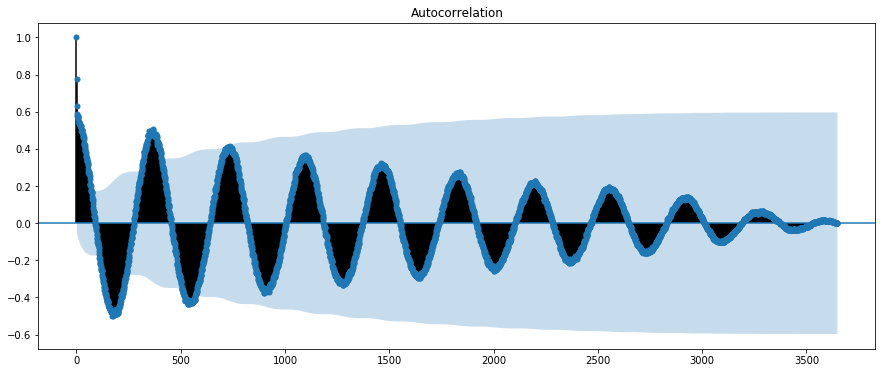

In [5]:
from statsmodels.graphics.tsaplots import plot_acf

# get the ACF using plot_acf(series)


### Interpreting the ACF

`plot_acf()` gives us  the lag value along the x-axis and the correlation on the y-axis between [-1 and 1] and The shaded region shows the confidence intervals (95% by defsault). The output tells us that values outside of the confidence intervals are very likely due to a correlation. If your data is strongly seasonal, the peaks will coincide with the seasonality period, so it can help you infer the seasonality. Once your series is stationary, the ACF can help guide your choice of moving average lags. Also it's a good way to confirm any trend, for a positive trend you'll see the ACF taking ages to die out. 

Above plot shows a high density using all lag values (by default) which makes it seem a bit harder to read. We can limit the number of lags on the x-axis to 100 to make the plot easier to read.

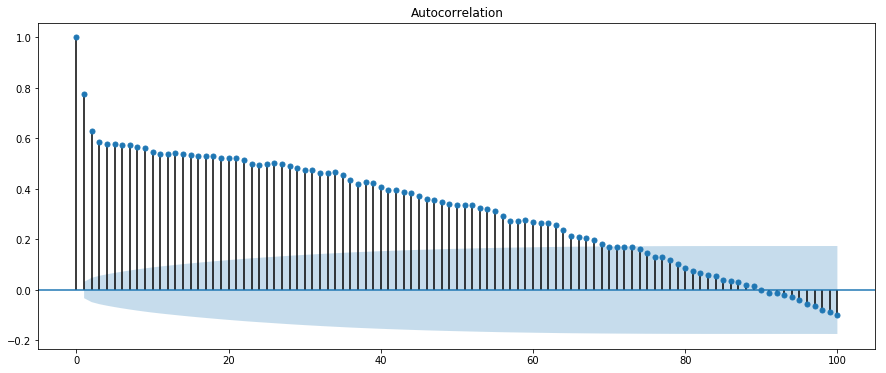

In [9]:
# Plot acf by passing lags=100 as an argument to plot_acf()


### Partial Auto-Correlation Function

In time series analysis, the *Partial Auto-correlation Function* **PACF** gives the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags. It contrasts with the autocorrelation function, which does not control for other lags. PACF can be thought of as a summary of the relationship between a time-series element with observations at a lag, *with the relationships of intervening observations removed.*

Let's calculate and plot a partial autocorrelation function for the first 100 lags in the Temperatures dataset using the `plot_pacf()` from the statsmodels library.

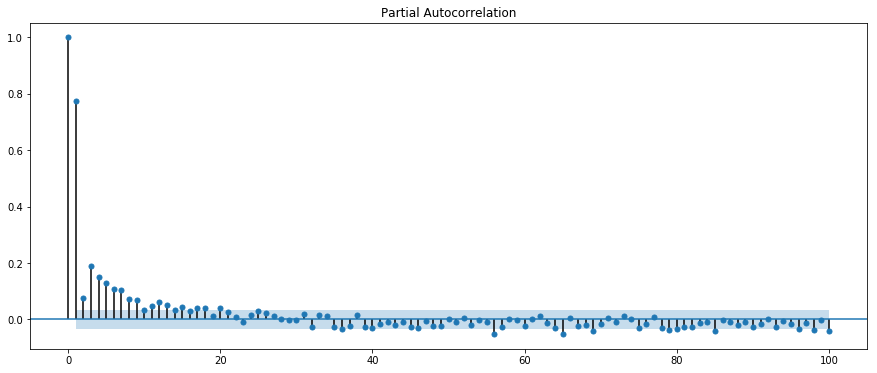

In [14]:
from statsmodels.graphics.tsaplots import plot_pacf

# Plot pacf by passing lags=100 as an argument to plot_pacf()

rcParams['figure.figsize'] = 15, 6
plot_pacf(temp, lags = 100)
plt.show()

The partial auto-correlation function can be interpreted as a regression of the series against its past lags. It helps you come up with a possible order for the auto regressive term. The terms can be interpreted the same way as a standard linear regression, that is the contribution of a change in that particular lag while holding others constant. 

### Intuition for AR and MA

#### Auto-Regression AR

Considering a time series that was generated by an autoregression (AR) process with a lag of k, we would expect the ACF plot for the AR(k) time series to be strong to a lag of k and remian stagnant for subsequent lag values, trailing off at some point as the effect was weakened. PACF, on the other hand describes the direct relationship between an observation and its lag. This would suggest that there would be no correlation for lag values beyond k.

#### Moving Average MA

With a time series generated by a moving average (MA) process with a lag of k, we would expect the ACF for the MA(k) process to show a strong correlation with recent values up to the lag of k, then a decline to minimal or no correlation. For the PACF, we would expect the plot to show a strong relationship to the lag and a trailing off of correlation from the lag onwards.


### Summary 

In this lab,we learnt about autocorrelation and partial autocorrelation plots for time series data with Python. We also looked at the difference and intuition for interpreting ACF and PACF plots. We shall next look into ARIMA time-series modelling technique that integrates these ideas to forcast future observations based on past data. 